### Name : Mohammed Junaid Iqbal Khalidi , USC ID : 1674712065, Github Username : junaid537 ###

### 1a : Load and Fetch data into dataframe ### 

In [1107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

%matplotlib inline
df = pd.read_excel('../data/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### 1b ###

### 1b (i) ###

In [1109]:
#Total rows and columns in Dataframe
total_rows=len(df)
total_cols= len(df.columns)
print(f'Total Rows = {total_rows} and Total Columns = {total_cols}')
print("Each row represent a sample point. For the columns, there four features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) while the column of PE is the net hourly electrical energy output of the plant, which is the value we want to predict based on feature")

Total Rows = 9568 and Total Columns = 5
Each row represent a sample point. For the columns, there four features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) while the column of PE is the net hourly electrical energy output of the plant, which is the value we want to predict based on feature


### 1b(ii) : Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings. ###

Shape of Dataset : (9568, 5) , rows= 9568, columns= 5


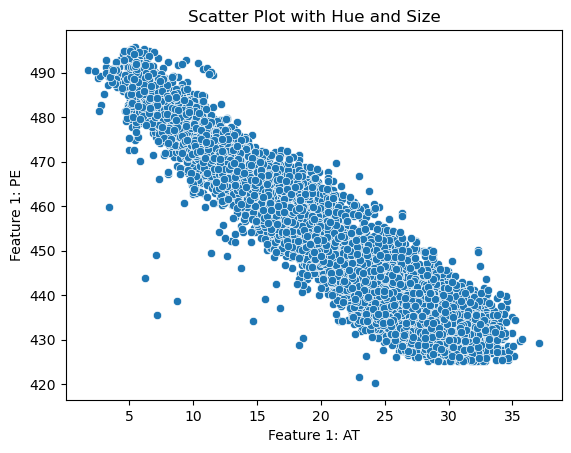

In [1111]:
rows,columns=df.shape
print(f'Shape of Dataset : {df.shape} , rows= {len(df)}, columns= {len(df.columns)}')
#sns.pairplot(df,hue="PE", markers=["o", "P","s","d","v"])
sns.scatterplot(x='AT', y='PE', data=df)

plt.xlabel('Feature 1: AT')
plt.ylabel('Feature 1: PE')
plt.title('Scatter Plot with Hue and Size')
plt.show()


**From Scatter Plot, there exist strong linear negative correlation between the Dependent variable PE and Independent Vriable AT, i.e. with increase in value of InDependent Variable 'AT' there is decrease in value of Dependent Variable 'PE'**

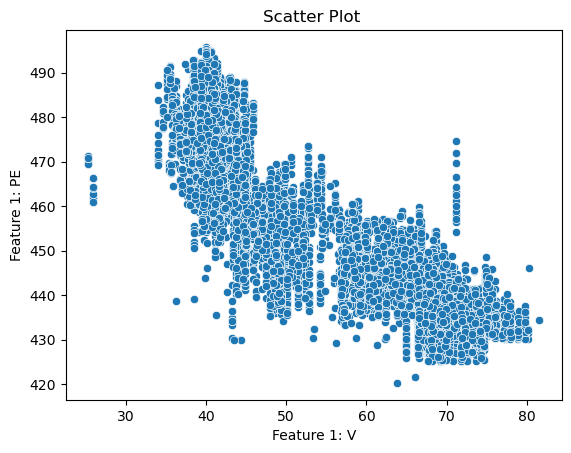

In [1113]:
sns.scatterplot(x='V', y='PE', data=df)
plt.xlabel('Feature 1: V')
plt.ylabel('Feature 1: PE')
plt.title('Scatter Plot ')
plt.show()
#There exist negative correlation between these pair of variables , and there exust moderate relationsjip

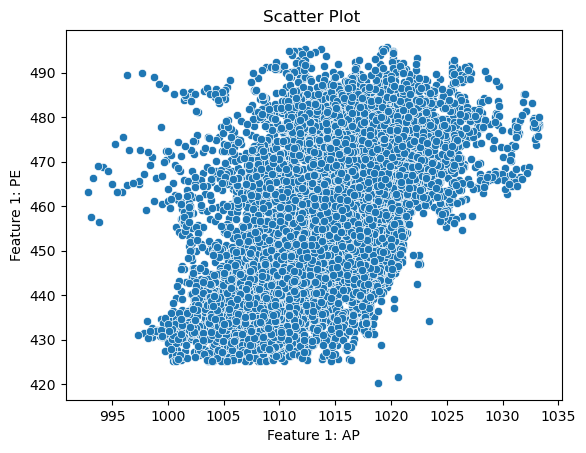

In [1115]:
sns.scatterplot(x='AP', y='PE', data=df)
plt.xlabel('Feature 1: AP')
plt.ylabel('Feature 1: PE')
plt.title('Scatter Plot ')
plt.show()

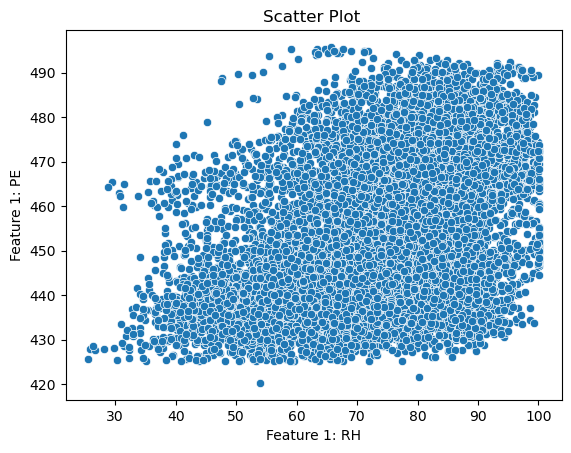

In [1117]:
sns.scatterplot(x='RH', y='PE', data=df)
plt.xlabel('Feature 1: RH')
plt.ylabel('Feature 1: PE')
plt.title('Scatter Plot ')
plt.show()

**Relation between every pair of Dependent and Independent variable**

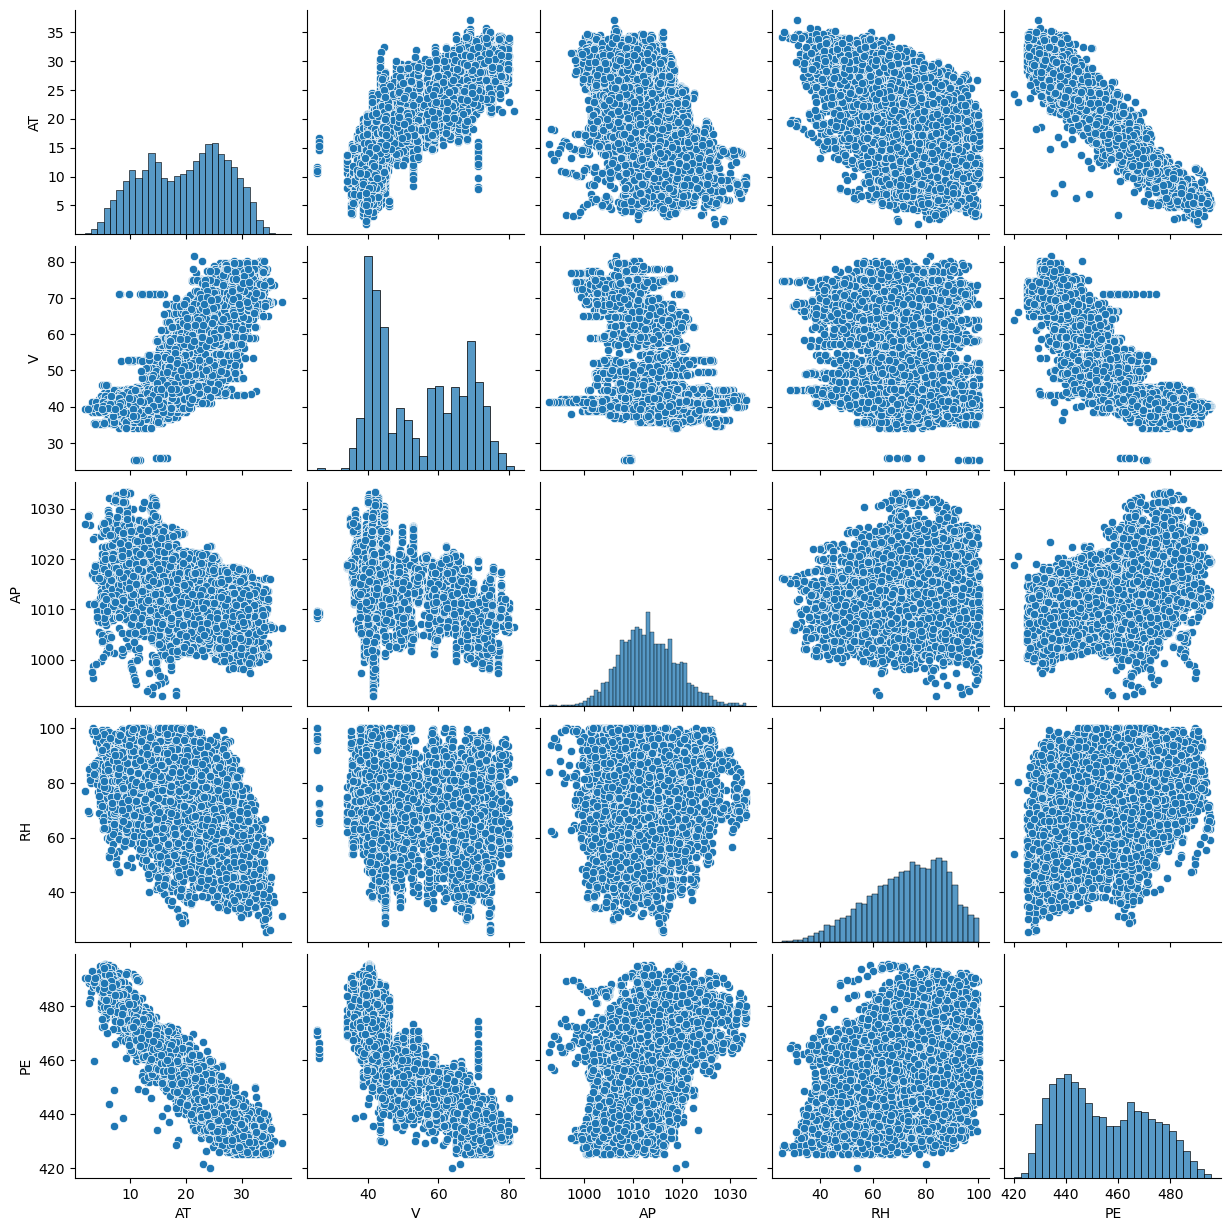

In [1119]:
sns.pairplot(df)

### Results ###
**PE and AT are negatively correlated.**

**V and AT are positively correlated.**

**PE and V are negatively correlated.**

data

In [1121]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### 1b (iii): What are the mean, the median, range, first and third quartiles, and in-terquartile ranges of each of the variables in the dataset? Summarize them in a table ###

In [1123]:
summary = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Range': df.max() - df.min(),
    'Q1': df.quantile(0.25),
    'Q3': df.quantile(0.75),
    'IQR': df.quantile(0.75) - df.quantile(0.25)
})

print(summary)

           Mean    Median  Range         Q1       Q3      IQR
AT    19.651231    20.345  35.30    13.5100    25.72  12.2100
V     54.305804    52.080  56.20    41.7400    66.54  24.8000
AP  1013.259078  1012.940  40.41  1009.1000  1017.26   8.1600
RH    73.308978    74.975  74.60    63.3275    84.83  21.5025
PE   454.365009   451.550  75.50   439.7500   468.43  28.6800


### 1c :For each predictor, fit a simple linear regression model to predict the response.Describe your results. In which of the models is there a statistically significant
### association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from
### your data for each of these regression tasks? ###

Slope:[-2.17131996] , Y-Intercept:497.0341198927665 


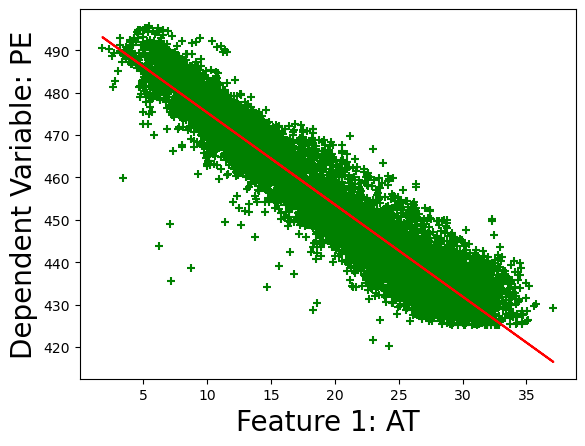

In [1125]:
reg1 = linear_model.LinearRegression()
reg1.fit(df[['AT']],df.PE)
plt.xlabel('Feature 1: AT',fontsize=20)
plt.ylabel('Dependent Variable: PE',fontsize=20)
plt.scatter(df.AT, df.PE, color='green',marker='+')
#sns.scatterplot(x=df.AT,y=df.PE,data=df)
plt.plot(df.AT,reg1.predict(df[['AT']]),color='red')
slope=reg1.coef_
y_intercept=reg1.intercept_
print(f'Slope:{slope} , Y-Intercept:{y_intercept} ')

Slope:[-1.16813513] , Y-Intercept:517.8015263083853 


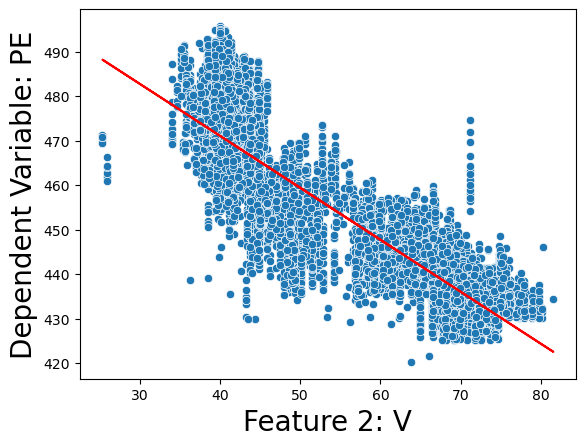

In [1127]:
reg2 = linear_model.LinearRegression()
reg2.fit(df[['V']],df.PE)
plt.xlabel('Feature 2: V',fontsize=20)
plt.ylabel('Dependent Variable: PE',fontsize=20)
#plt.scatter(df.V, df.PE, color='green',marker='+')
sns.scatterplot(x=df.V,y=df.PE,data=df)
plt.plot(df.V,reg2.predict(df[['V']]),color='red')
slope=reg2.coef_
y_intercept=reg2.intercept_
print(f'Slope:{slope} , Y-Intercept:{y_intercept} ')

Slope:[1.48987167] , Y-Intercept:-1055.2609889844364 


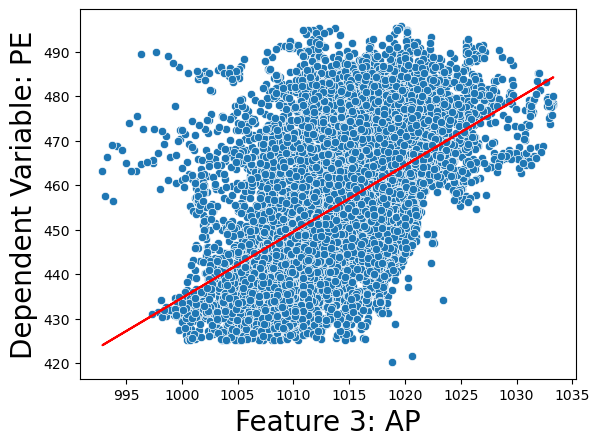

In [1129]:
reg3=linear_model.LinearRegression()
reg3.fit(df[['AP']],df.PE)
plt.xlabel('Feature 3: AP',fontsize=20)
plt.ylabel('Dependent Variable: PE',fontsize=20)
sns.scatterplot(x=df.AP,y=df.PE,data=df)
plt.plot(df.AP,reg3.predict(df[['AP']]),color='red')
slope=reg3.coef_
y_intercept=reg3.intercept_
print(f'Slope:{slope} , Y-Intercept:{y_intercept} ')

Slope:[0.4556501] , Y-Intercept:420.96176615548376 


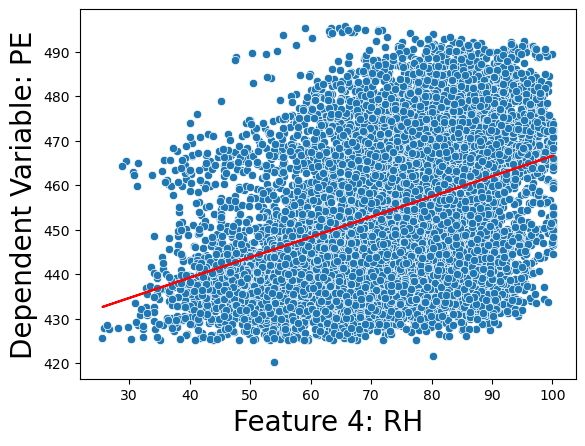

In [1131]:
reg4=linear_model.LinearRegression()
reg4.fit(df[['RH']],df.PE)
plt.xlabel('Feature 4: RH',fontsize=20)
plt.ylabel('Dependent Variable: PE',fontsize=20)
sns.scatterplot(x=df.RH,y=df.PE,data=df)
plt.plot(df.RH,reg4.predict(df[['RH']]),color='red')
slope=reg4.coef_
y_intercept=reg4.intercept_
print(f'Slope:{slope} , Y-Intercept:{y_intercept} ')

In [1133]:
# y=mx +c
slope=reg1.coef_
y_intercept=reg1.intercept_
print(m,c)
df1=df.head(3)
reg1.predict(df1[['AT']])

[-2.17131996]           PE
891   445.34
3860  478.21
2255  463.99
8548  448.08
2662  484.63
...      ...
4519  447.43
932   466.07
1253  441.91
8640  459.83
8620  458.26

[6697 rows x 1 columns]


array([464.55117331, 442.36028334, 485.9386749 ])

In [1135]:
results={}
df1=df
def buildModelAndSummarize(predictor,label):
    X = df[[predictor]]
    y = df[label]
    # Fit the model
    y_intercept=sm.add_constant(X)
    model = sm.OLS(y, y_intercept).fit()
    '''print(model.summary())'''
    #get predictions
    df1['Predicted_Y'] = model.predict(y_intercept)
    df1['Residuals'] = df1[label] - df1['Predicted_Y']
    #Finding outliers
    influence = model.get_influence()
    cooks_distance = influence.cooks_distance
    df['CooksD']=cooks_distance[0]
    #Visualizing cook's distance and finding visual points :
    plt.figure(figsize=(12,8))
    plt.scatter(df.index, cooks_distance[0])
    plt.plot(df.index, cooks_distance[0],color='black')
    plt.xlabel("Row number", fontsize=12)
    plt.ylabel("Cook's distance",fontsize=12)
    plt.title('Calculating Cook Distance for each sample' , fontsize = 22)
    plt.show
    #Remove those outliers which are 4 times the mean cook's distance                                       
    mean_cooks=np.mean(cooks_distance[0])
    print(f'Mean Cooks : {mean_cooks}')
    #Influential points
    mean_cooks_list = [4*mean_cooks for i in df.index]
    # Draw plot
    plt.figure(figsize = (12, 8))
    plt.scatter(df.index, cooks_distance[0])
    plt.plot(df.index, mean_cooks_list, color="red")
    plt.xlabel('Row Number in the DataFrame', fontsize = 12)
    plt.ylabel('Cooks Distance', fontsize = 12)
    plt.title("Visualizing Influencial Points(datapoint above red line are outliers as they exceed 4 times the mean Cook's distance)", fontsize = 22)
    plt.show()
    outlier_x=[]
    outlier_y=[]
    xx = df[predictor].to_numpy()
    yy = df[label].to_numpy()
    for i in range(len(cooks_distance[0])):
        if cooks_distance[0][i] > 4 * mean_cooks:
            outlier_x.append(xx[i])
            outlier_y.append(yy[i])
    #Plotting Outliers 
    
    plt.scatter(xx, yy, color="green", s=5, alpha=0.4)
    plt.scatter(outlier_x, outlier_y, color="red", s=5, alpha=0.8, label='outliers')
    plt.plot(X, df1['Predicted_Y'], color="red")
    plt.xlabel(predictor)
    plt.ylabel(label)
    plt.legend()
    plt.show()
    # Calculate P_value , residuals and check for Statistical Significance
    results[predictor] = {
        'r_squared': model.rsquared,
        'p_value': model.pvalues.iloc[1],  # p-value for the predictor
        'coef': model.params.iloc[1],  # coefficient for the predictor
        'mse': mean_squared_error(y, model.predict(sm.add_constant(X))),
        'residuals': y - model.predict(sm.add_constant(X))
    }
    print(model.summary())
    for key,value in results['AT'].items():
        print(key, value)

### AT vs PE ###

### Red Colour in Scatter Plot denotes the Outliers ( Removing those outliers which are 4 times the Mean of Cook's Distance ) ###
###  identifing outliers that exceed 4 times the mean Cook's distance ###

Mean Cooks : 0.00010795642365810101


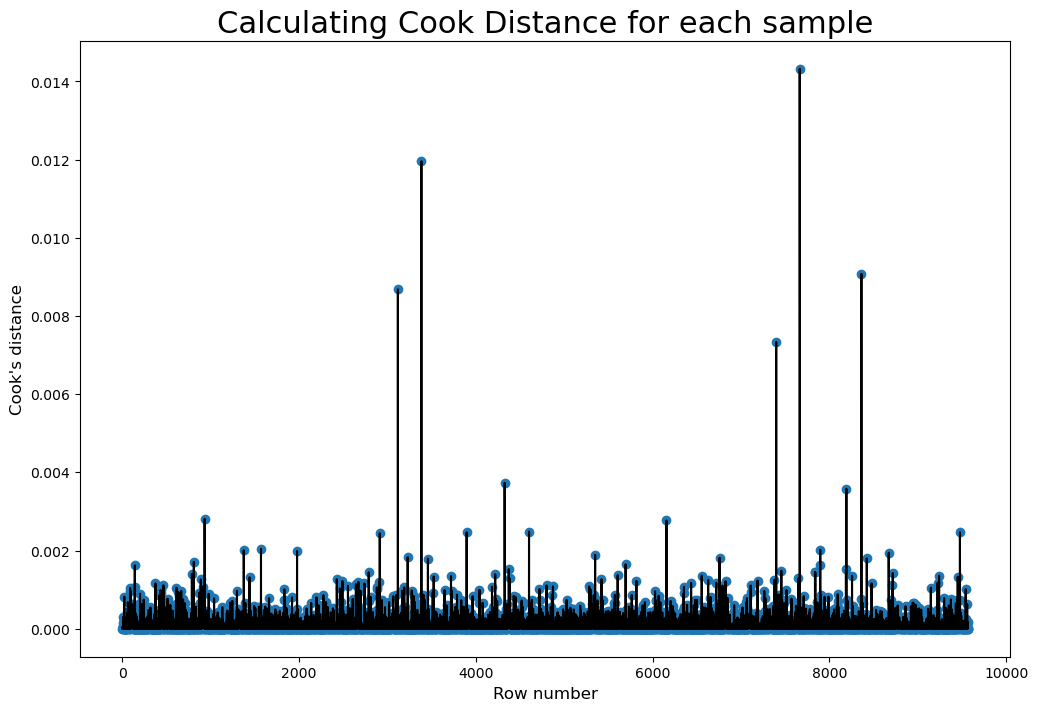

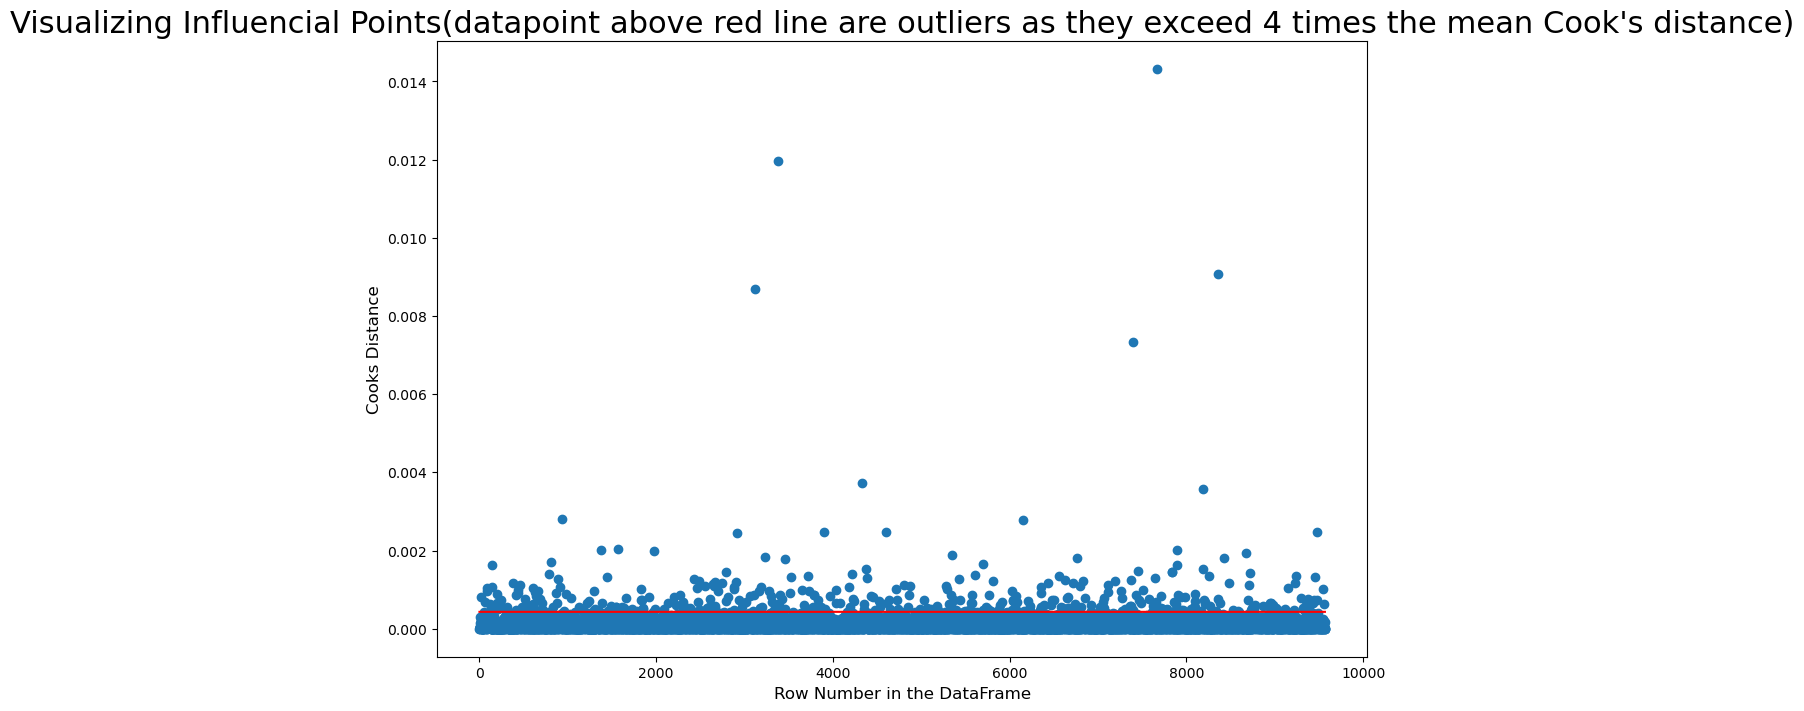

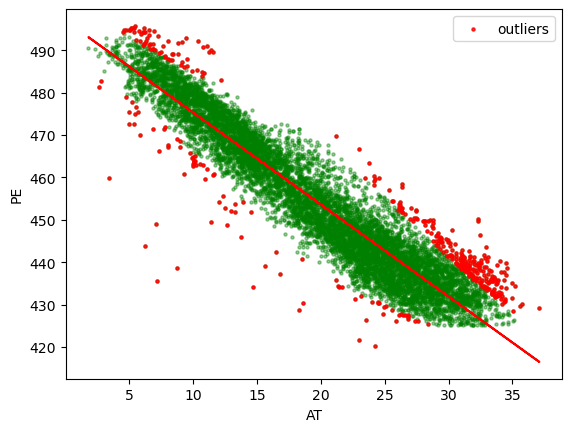

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:02:59   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

In [1138]:
buildModelAndSummarize('AT','PE')

### The estimated coefficient for AT has a p-value of 0 which is less than 0.05, which indicates statistically significant. ###

### Removing those outliers which are 4 times the Mean of Cook's Distance ###

### V vs PE ###

Mean Cooks : 0.00010101811880919248


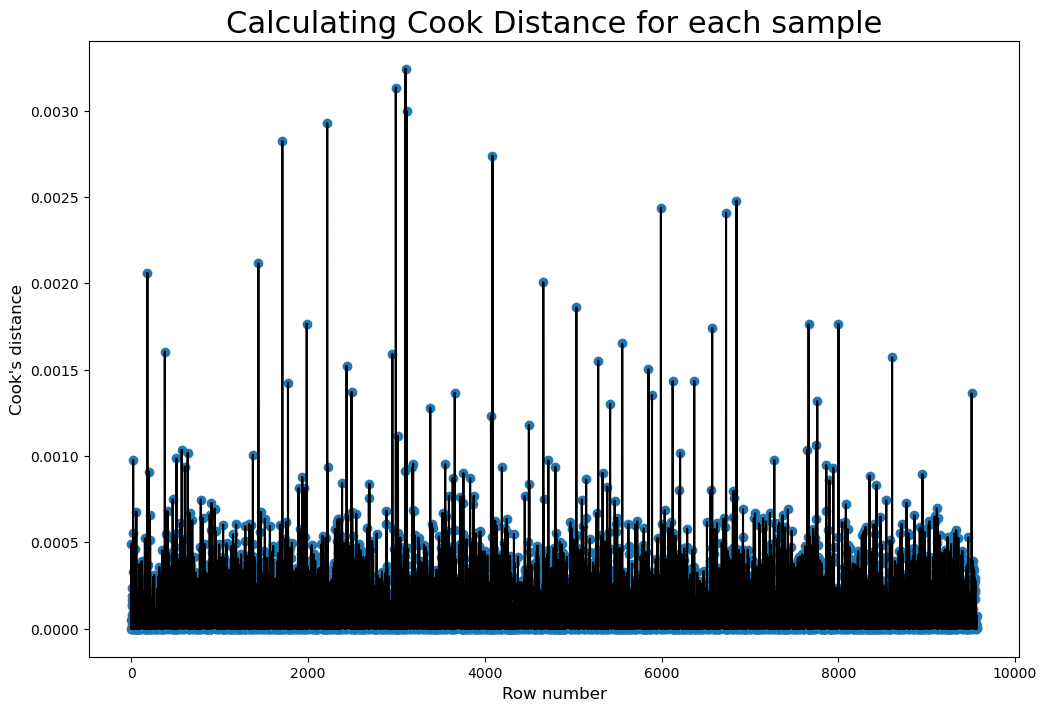

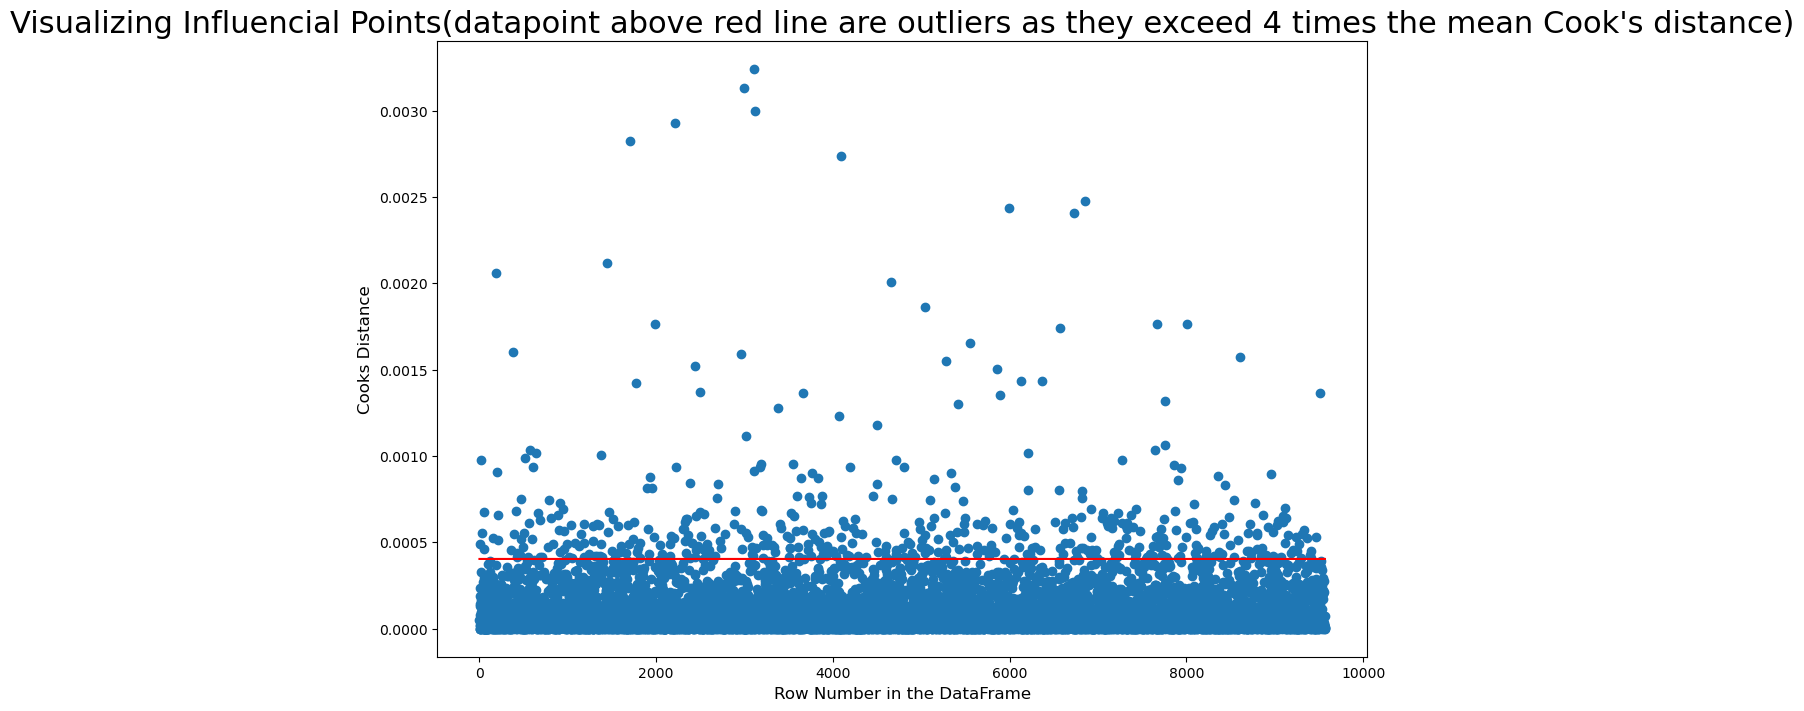

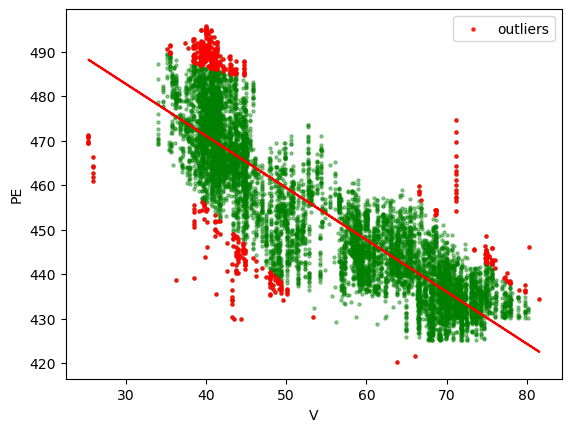

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:03:04   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

In [1140]:
buildModelAndSummarize('V','PE')

### The estimated coefficient for V has a p-value of 0 which is less than 0.05, which indicates statistically significant. ###

### AP vs PE ###

Mean Cooks : 0.00010392685478770487


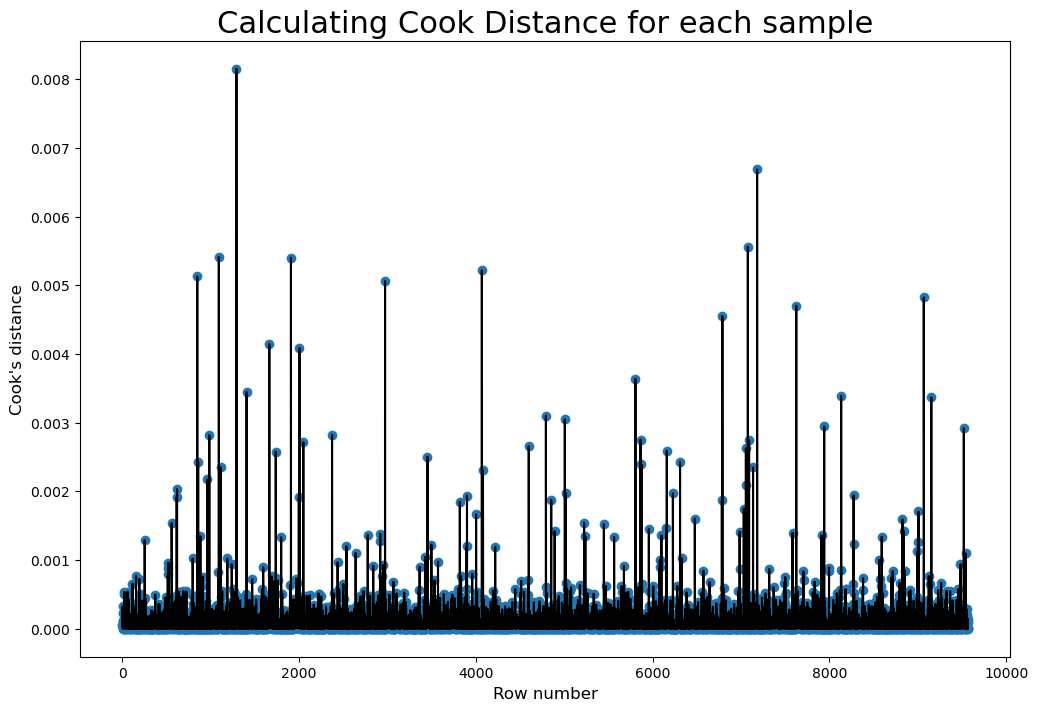

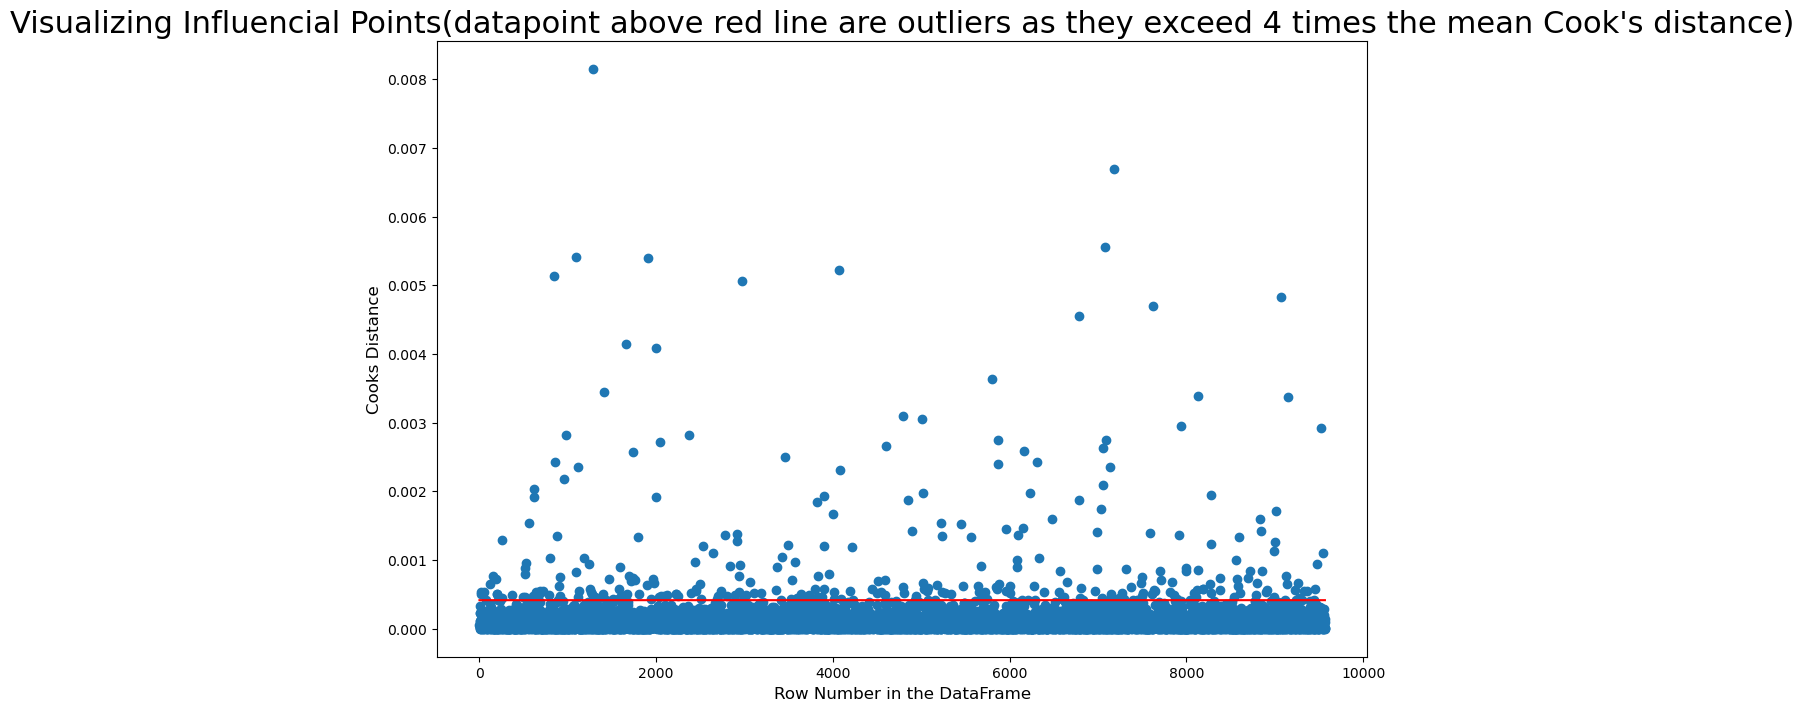

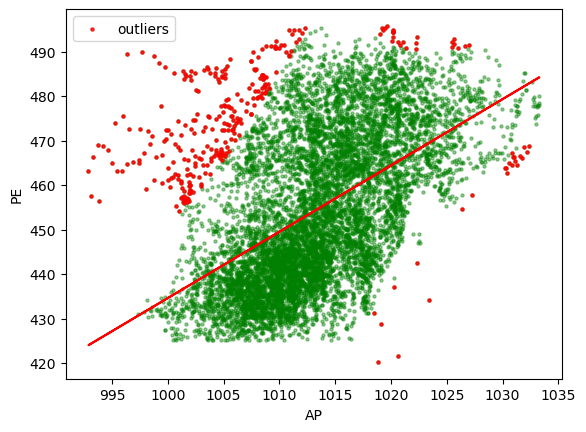

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:03:10   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

In [1142]:
buildModelAndSummarize('AP','PE')

### The estimated coefficient for AP has a p-value of 0 which is less than 0.05, which indicates statistically significant. ###

### RH vs PE ###

Mean Cooks : 9.582470576229031e-05


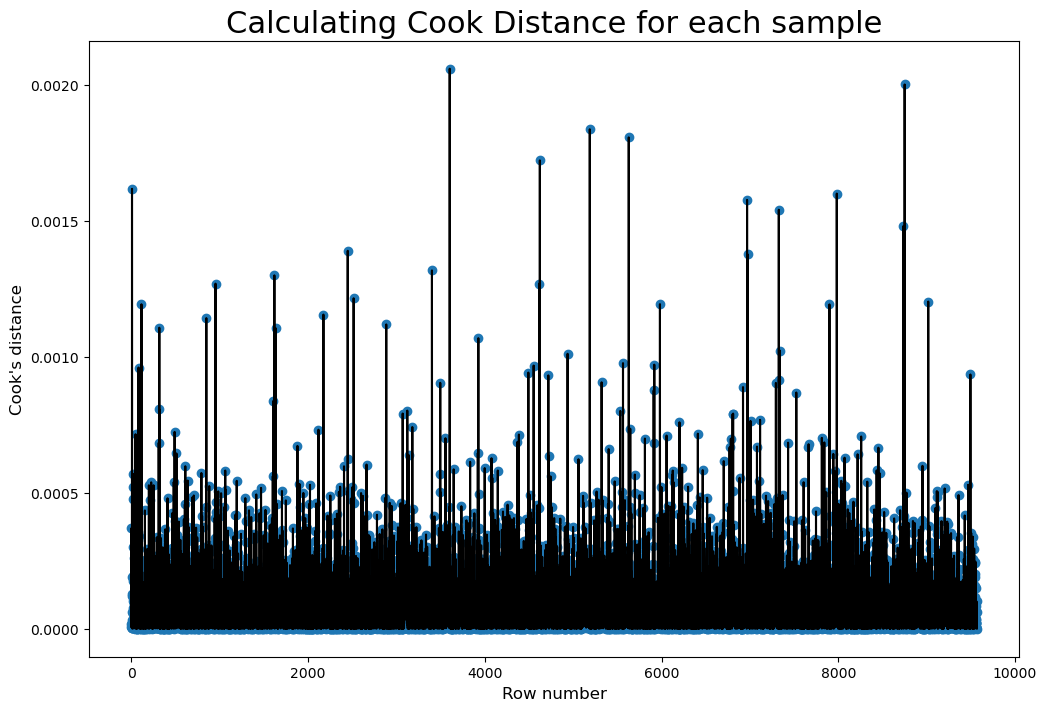

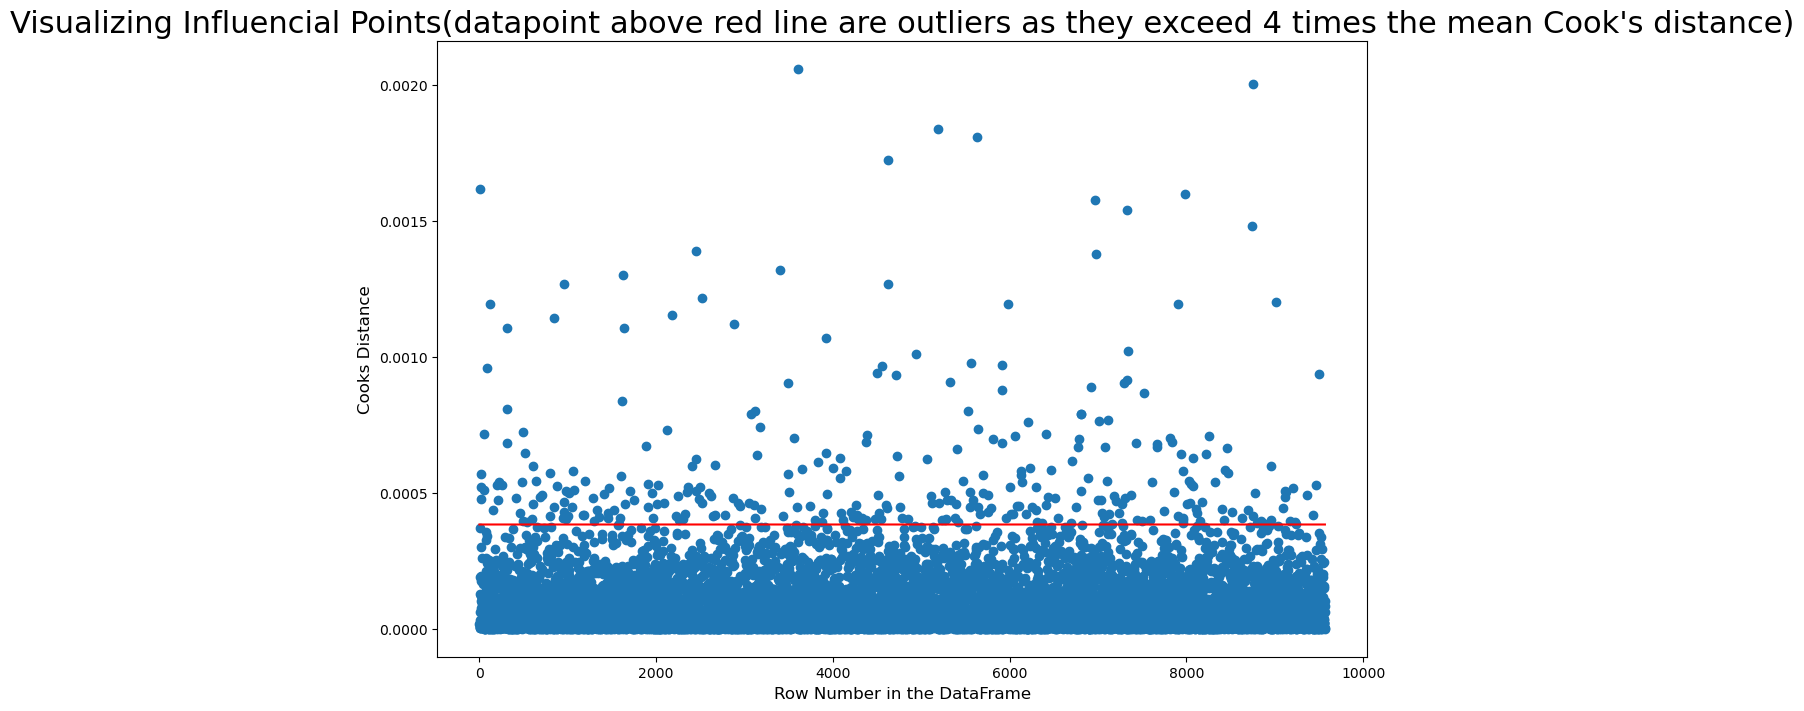

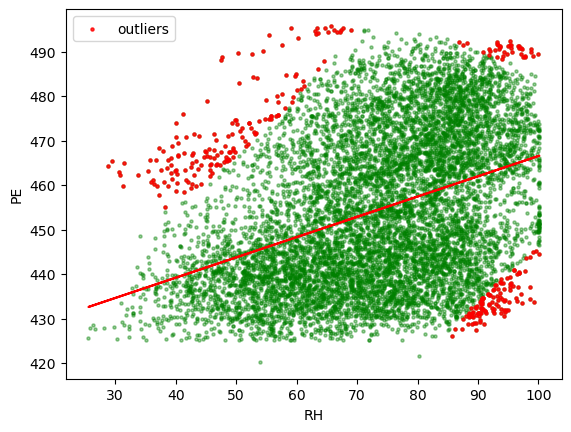

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:03:25   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

In [1144]:
buildModelAndSummarize('RH','PE')

### The estimated coefficient for RH has a p-value of 0 which is less than 0.05, which indicates statistically significant. ###

### 1d : Fit a multiple regression model to predict the response using all of the predictors.Describe your results. For which predictors can we reject the null hypothesis H0:βj= 0? ###

In [1146]:
X=df[['AT','V','AP','RH']]
Y=df['PE']
X_with_const = sm.add_constant(X)  # Adding an intercept term
#Fit the multiple regression model
model = sm.OLS(Y, X_with_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:03:37   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Since  all p-values are less than 0.05 , we can reject null hypothesis for all !

### 1e : How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the
### multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression
### model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis. ###

In [1148]:
list_univariate_coeffs=[]
features=['AT','V','AP','RH']
for i in features:
    list_univariate_coeffs.append(results[i]['coef'])
type(model.params.iloc[1:])
list_multivariate_coeffs = model.params.iloc[1:].tolist()
coef_df = pd.DataFrame({
    'Predictor': features,
    'Univariate Coefficients': list_univariate_coeffs,
    'Multiple Coefficients': list_multivariate_coeffs
})
coef_df

,Predictor,Univariate Coefficients,Multiple Coefficients
0,AT,-2.171320,-1.977513
1,V,-1.168135,-0.233916
2,AP,1.489872,0.062083
3,RH,0.455650,-0.158054


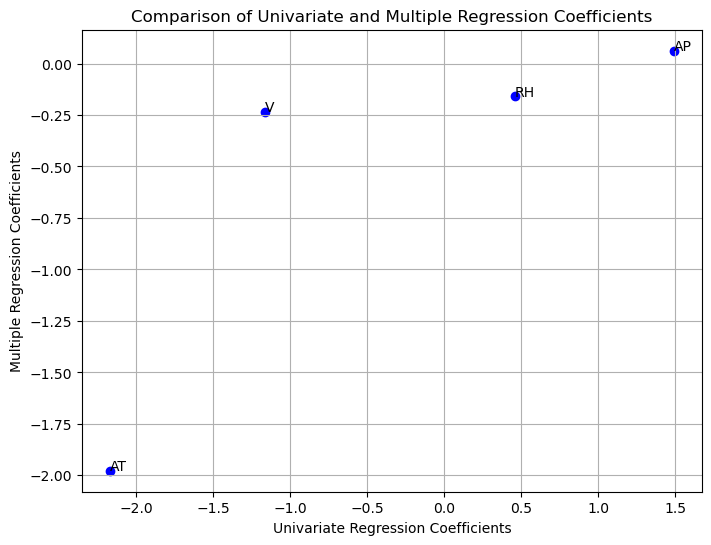

In [1150]:
#Plotting
plt.figure(figsize=(8, 6))
plt.scatter(coef_df['Univariate Coefficients'], coef_df['Multiple Coefficients'], color='blue')
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.title('Comparison of Univariate and Multiple Regression Coefficients')
for i, txt in enumerate(coef_df['Predictor']):
    plt.annotate(txt, (coef_df['Univariate Coefficients'][i], coef_df['Multiple Coefficients'][i]))

plt.grid()
plt.show()

### Observations
### We can see that for the variable Temperature (AT), the univariate regression coefficients is similar to the multiple regression coefficients, though it is estimated having large impact in the multiple regression case.

### For Exhaust Vacuum (V), its coefficient has higher estimated value in multiple regression than in univariate regression.

### For the variable Ambient Pressure (AP), we see a large difference between the estimated coefficient value in univariate regression and multiple regression. 

### The case of variables Relative Humidity (RH) : In univariate regressions the coefficient of RH is greater than 0 but case of multiple regression,the coefficient is less than 0. ###

### 1f :Is there evidence of nonlinear association between any of the predictors and the
### response? To answer this question, for each predictor X , fit a model of the form 2 Y=β0+β1X+β2X^2+β3X^3+E ###

In [1152]:
def polynomial_regression(predictor,label):
    x_train = df[[predictor]]
    y_train = df[label]
    # Include polynomial feature for x_train with degree of 3
    x_poly = PolynomialFeatures(3)
    x_train_sm = x_poly.fit_transform(x_train)
    #print(x_train_sm)
     # Fit the model
    model = sm.OLS(y_train, x_train_sm).fit()
    
    # Display the model summary
    print(model.summary())

In [1156]:
polynomial_regression('AT','PE')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:03:57   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

**From the summary, we see the p-value for the coefficient of the cubic term is essentially 0, which is less than 0.05 !
. We reject the null hypothesis and conclude evidence for the alternative hypothesis that 
 is not zero. This indicates that the estimator for the cubic term is statistically significant. There is evidence of nonlinear association given the predictor Temperature.**

In [1158]:
polynomial_regression('V', 'PE')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:04:00   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

**From the summary,the p-value for the coefficient of the cubic term is 0.014 wich is less than 0.05
. At this point, we reject the null and conclude evidence for the alternative hypothesis that 
 is not zero. This indicates that the estimator for the cubic term is statistically significant. There is evidence of nonlinear association**

In [1160]:
polynomial_regression('AP', 'PE')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:04:02   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

****From the summary,the p-value for the coefficient of the cubic term is less than 0.05
. At this point, we reject the null and conclude evidence for the alternative hypothesis that 
 is not zero. This indicates that the estimator for the cubic term is statistically significant. There is evidence of nonlinear association****

In [1162]:
polynomial_regression('RH', 'PE')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:04:04   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

**From the summary,the p-value for the coefficient of the cubic term is 0.014 wich is less than 0.05 . At this point, we reject the null and conclude evidence for the alternative hypothesis that is not zero. This indicates that the estimator for the cubic term is statistically significant. There is evidence of nonlinear association**

### 1g :Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant. ###

In [1164]:
X = df[["AT", "V", "AP", "RH"]]
Y=df['PE']
poly = PolynomialFeatures(interaction_only=True)
x_interactions = poly.fit_transform(X)

# Fit linear regression model
model = sm.OLS(Y, x_interactions)
res = model.fit()
    
# Display model summary
print(res.summary())
# Display all combinations of features
print('\n')
print("-----Displaying all combinations of features in a DataFrame : -----")
display(poly.get_feature_names_out())
# Create a DataFrame to map all interaction features to p-values
p_values = res.pvalues
interaction_feature_names = poly.get_feature_names_out(input_features=X.columns)
feature_pvalue_map = pd.DataFrame({
    'Feature': interaction_feature_names,
    'P-Value': p_values
})
feature_pvalue_map 

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:04:07   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

array(['1', 'AT', 'V', 'AP', 'RH', 'AT V', 'AT AP', 'AT RH', 'V AP',
       'V RH', 'AP RH'], dtype=object)

,Feature,P-Value
const,1,3.231607e-18
x1,AT,6.701873e-02
x2,V,1.371251e-08
x3,AP,4.735732e-02
x4,RH,4.225213e-02
x5,AT V,3.333358e-117
x6,AT AP,4.520509e-01
x7,AT RH,1.216944e-10
x8,V AP,2.877026e-07
x9,V RH,8.619366e-02


**It can be seen that (AT:V),(AT:RH),(AP:RH),(V:AP) have  their p_values lower than 0.05 and are therefore statistically signifiacant**

**For (AT:AP) and (V:RH) value , its p_value is large and cannot be considered statistically significant**

### 1h : Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a
### randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities,
### and remove insignificant variables using p-values (be careful about interaction
### terms). Test both models on the remaining points and report your train and test MSEs

In [1166]:
Table_of_Models ={}
# Split training and testing data
train_set, test_set = train_test_split(df, train_size=0.7)
x_train=train_set[['AT','V','AP','RH']]
y_train=train_set[['PE']]
x_test=test_set[['AT','V','AP','RH']]
y_test=test_set[['PE']]
# Add constant for intercept
x_train_sm = sm.add_constant(x_train)
x_test_sm = sm.add_constant(x_test)
#Fit the model or train the model on the training_set
model = sm.OLS(y_train,x_train_sm).fit()
#Predict on train data using model
trainData_prediction = model.predict(x_train_sm)
#Predict on test data using model
testData_prediction = model.predict(x_test_sm)
# Calculate train MSE
train_mse = mean_squared_error(y_train, trainData_prediction)
# Calculate test MSE
test_mse = mean_squared_error(y_test, testData_prediction)
print(f'MSE on Test Set for Linear Regression without interactions , Train Error : {np.around(train_mse,6)} , Test Error :{np.around(test_mse,6)}')
Table_of_Models['Linear Regression without interactions'] = [train_mse,test_mse]


MSE on Test Set for Linear Regression without interactions , Train Error : 21.290181 , Test Error :19.567261


**including interaction and quadratic terms :**

In [1168]:
from IPython import get_ipython
get_ipython().displayhook.cache_size = 2000
x_train=train_set[['AT','V','AP','RH','PE']]
#formula = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH + AP * V * AT + AP * V * RH + AP * AT * RH + V * AT * RH + V * AT * AP * RH ' #statsmodels.formula.api automatically includes y-intercept
formula = 'PE ~ AT*V*AP*RH + I(AT**2) + I(V**2) + I(AP**2) + I(RH**2)'
'''
formula = (
    'PE ~ AT + V + AP + RH + '
    'np.power(AT, 2) + np.power(V, 2) + np.power(AP, 2) + np.power(RH, 2) + '
    'AT * V + AT * AP + AT * RH + '
    'V * AP + V * RH + AP * RH + '
    'AP * V * AT + AP * V * RH + AP * AT * RH + V * AT * RH + '
    'V * AT * AP * RH'
)
'''
#Fit the model or train the model on the training_set
interactive_quadratic_model = smf.ols(formula, x_train).fit()
#Predict on train data using model
trainData_prediction = interactive_quadratic_model.predict(x_train.iloc[:, :-1])
#Predict on test data using model
testData_prediction = interactive_quadratic_model.predict(x_test)
# Calculate train MSE
train_mse = mean_squared_error(y_train, trainData_prediction)
# Calculate test MSE
test_mse = mean_squared_error(y_test, testData_prediction)
Table_of_Models['Linear Regression with interactions_Quadratics'] = [train_mse,test_mse]
print(f'MSE on Test Set for Linear Regression with interactions_Quadratics , Train Error : {np.around(train_mse,6)} , Test Error :{np.around(test_mse,6)}')
interactive_quadratic_model.summary()

MSE on Test Set for Linear Regression with interactions_Quadratics , Train Error : 18.181349 , Test Error :16.691417


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     5295.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:04:20   Log-Likelihood:                -19215.
No. Observations:                6697   AIC:                         3.847e+04
Df Residuals:                    6677   BIC:                         3.861e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2967.2060   1747.001     -1.698      0.089   -6391.885     457.473
AT          -259.8248     39.639     -6.555      0.000    -337.530    -182.119
V           -103.8873     21.523     -4.827      0.000    -146.079     -61.695
AT:V           4.7342      0.773      6.123      0.000       3.218       6.250
AP            11.5771      3.010      3.846      0.000       5.676      17.479
AT:AP          0.2541      0.039      6.491      0.000       0.177       0.331
V:AP           0.1020      0.021      4.801      0.000       0.060       0.144
AT:V:AP       -0.0047      0.001     -6.102      0.000      -0.006      -0.003
RH           -41.5045     12.190     -3.405      0.001     -65.400     -17.609
AT:RH          2.4292      0.518      4.689      0.000       1.414       3.445
V:RH           0.8851      0.277      3.194      0.001       0.342       1.428
AT:V:RH       -0.0429      0.010     -4.180      0.000      -0.063      -0.023
AP:RH          0.0412      0.012      3.424      0.001       0.018       0.065
AT:AP:RH      -0.0024      0.001     -4.703      0.000      -0.003      -0.001
V:AP:RH       -0.0009      0.000     -3.187      0.001      -0.001      -0.000
AT:V:AP:RH   4.24e-05   1.01e-05      4.178      0.000    2.25e-05    6.23e-05
I(AT ** 2)     0.0147      0.004      3.985      0.000       0.007       0.022
I(V ** 2)     -0.0012      0.001     -1.268      0.205      -0.003       0.001
I(AP ** 2)    -0.0080      0.001     -5.752      0.000      -0.011      -0.005
I(RH ** 2)    -0.0020      0.000     -6.049      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1560.130   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14080.681
Skew:                          -0.857   Prob(JB):                         0.00
Kurtosis:                       9.894   Cond. No.                     3.04e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Based on the above regression results we can remove (V^2)  as   p_value of coefficient is more than 0.05 and thus is statistically insignificant**

In [1171]:
# new model after removing terms :
#formula = 'PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(AP,2) + np.power(RH,2) + AT*V + AT*RH + AP*RH'
#Removing V**2 :
formula = 'PE ~ AT*V*AP*RH + I(AT**2) + I(AP**2) + I(RH**2)'
#Fit the model or train the model on the training_set
model = smf.ols(formula, x_train).fit()
print(model.summary())
#Predict on train data using model
trainData_prediction = model.predict(x_train.iloc[:, :-1])
#Predict on test data using model
testData_prediction = model.predict(x_test)
# Calculate train MSE
train_mse = mean_squared_error(y_train, trainData_prediction)
# Calculate test MSE
test_mse = mean_squared_error(y_test, testData_prediction)
Table_of_Models['Linear Regression after removing statistically insignificant interactions_Quadratics'] = [train_mse,test_mse]
print(f'MSE on Test Set for Linear Regression after removing statistically insignificant interactions_Quadratics , Train Error : {np.around(train_mse,6)} , Test Error :{np.around(test_mse,6)}')


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     5588.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:05:21   Log-Likelihood:                -19215.
No. Observations:                6697   AIC:                         3.847e+04
Df Residuals:                    6678   BIC:                         3.860e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2847.2536   1744.516     -1.632      0.1

In [1173]:
x_train


,AT,V,AP,RH,PE
7019,21.93,62.91,1013.45,74.62,449.17
8642,5.63,39.22,1013.35,77.67,486.83
1581,27.19,64.27,1013.06,58.13,444.54
4984,19.43,52.90,1018.35,61.12,456.08
6364,21.31,50.78,1008.68,85.28,445.17
...,...,...,...,...,...
3052,22.03,59.43,1006.88,82.05,442.90
6230,13.69,40.10,1014.38,83.57,470.76
9424,12.95,43.71,1025.63,90.70,469.15
5,26.27,59.44,1012.23,58.77,443.67


**Comparing the predictor model of linear terms with non linear one , we can see decrease in MSE from 20.60 to 17.68, model is improved with the interaction terms and quadratic nonlinearities.**

In [1175]:
Table_of_Models
df2=pd.DataFrame(Table_of_Models)
df2.index=['Train Error','Test Eror']
df2

,Linear Regression without interactions,Linear Regression with interactions_Quadratics,Linear Regression after removing statistically insignificant interactions_Quadratics
Train Error,21.290181,18.181349,18.185726
Test Eror,19.567261,16.691417,16.680857


### 1 i (1): Perform k -nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2, . . . ,100} that gives you the
### best fit. Plot the train and test errors in terms of 1/k ###

The optimum k value for raw data is : 6
Train MSE : 11.735709160403497
Test MSE : 14.772738773752854


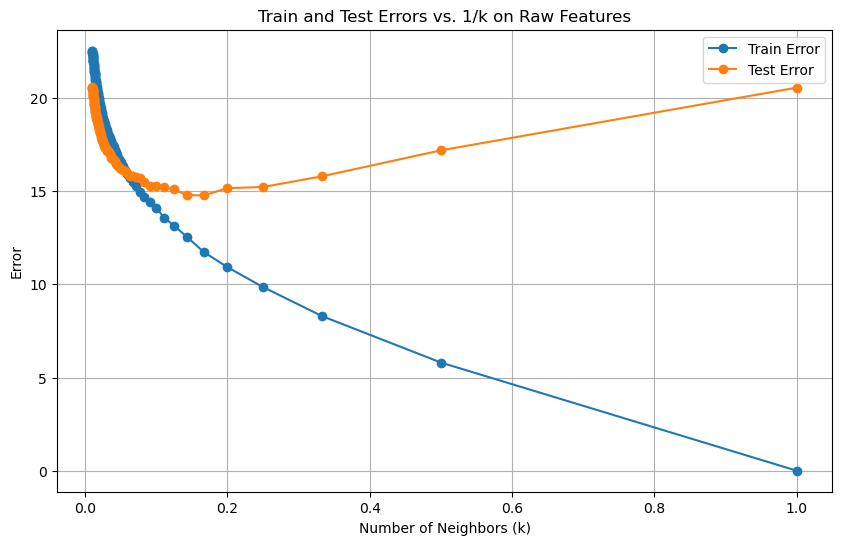

In [1177]:
#On Raw Data
train_mse = []
test_mse = []
k_reverse=[]
X_train=x_train.iloc[:, :-1]
Y_train = y_train
k_values=list(range(1,101))
# Iterating through k in {1, 2, ..., 100}
for k in k_values:
    # Declare regressor
    model = KNeighborsRegressor(n_neighbors=k)
    # Train model
    model.fit(X_train, y_train)
    k_reverse.append(1/k)
    #Prediction on train data
    trainData_prediction = model.predict(X_train)
    # Calculate Train MSE
    mse_train = mean_squared_error( y_train, trainData_prediction)
    train_mse.append(mse_train)
    #Prediction on test data
    testData_prediction = model.predict(x_test)
    # Calculate Test MSE
    mse_test = mean_squared_error( y_test, testData_prediction)
    test_mse.append(mse_test)
optimum_k_index = np.argmin(test_mse)
optimum_k=k_values[optimum_k_index]
print(f'The optimum k value for raw data is : {optimum_k}')
print(f'Train MSE : {train_mse[optimum_k_index]}')
print(f'Test MSE : {test_mse[optimum_k_index]}')
Table_of_Models['KNearest Regressor on Raw Features']=[train_mse[optimum_k_index], test_mse[optimum_k_index]]
#Plotting train and test  errors in terms of 1/k
plt.figure(figsize=(10, 6))
plt.plot(k_reverse, train_mse , label='Train Error', marker='o')
plt.plot(k_reverse, test_mse, label='Test Error', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.title('Train and Test Errors vs. 1/k on Raw Features')
#plt.gca().invert_xaxis()  # To have the largest k on the left
plt.legend()
plt.grid(True)
plt.show()

The optimum k value for raw data is : 6
Train MSE : 10.76359258996566
Test MSE : 14.187861694531518


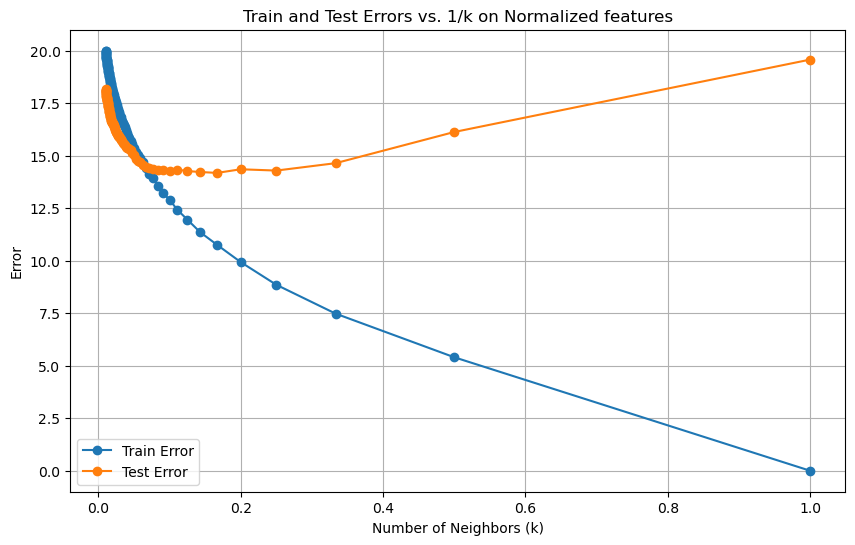

In [1180]:
#From ChatGPT : Prompt : how to build Linear Regression Model using normalized data ?
# from sklearn.preprocessing import MinMaxScaler
X_train=x_train.iloc[:, :-1]
train_mse = []
test_mse = []
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(x_test)
for k in k_values:
    # Declaring Model
    model = KNeighborsRegressor(n_neighbors=k)
    # Train model
    model.fit(X_normalized, Y_train)
    # Prediction on train data
    trainData_prediction = model.predict(X_normalized)
    # Calculate Train MSE
    mse_train = mean_squared_error( Y_train, trainData_prediction)
    train_mse.append(mse_train)
    #Prediction on test data
    testData_prediction = model.predict(X_test_normalized)
    # Calculate Test MSE
    mse_test = mean_squared_error( y_test, testData_prediction)
    test_mse.append(mse_test)
optimum_k_index = np.argmin(test_mse)
optimum_k=k_values[optimum_k_index]
print(f'The optimum k value for raw data is : {optimum_k}')
print(f'Train MSE : {train_mse[optimum_k_index]}')
print(f'Test MSE : {test_mse[optimum_k_index]}')
Table_of_Models['KNearest Regressor on Normalized Features']=[train_mse[optimum_k_index], test_mse[optimum_k_index]]
#Plotting train and test  errors in terms of 1/k
plt.figure(figsize=(10, 6))
plt.plot(k_reverse, train_mse , label='Train Error', marker='o')
plt.plot(k_reverse, test_mse, label='Test Error', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.title('Train and Test Errors vs. 1/k on Normalized features')
#plt.gca().invert_xaxis()  # To have the largest k on the left
plt.legend()
plt.grid(True)
plt.show()

### 1j ###

In [1182]:
Table_of_Models
df2=pd.DataFrame(Table_of_Models)
df2.index=['Train Error','Test Eror']
df2

,Linear Regression without interactions,Linear Regression with interactions_Quadratics,Linear Regression after removing statistically insignificant interactions_Quadratics,KNearest Regressor on Raw Features,KNearest Regressor on Normalized Features
Train Error,21.290181,18.181349,18.185726,11.735709,10.763593
Test Eror,19.567261,16.691417,16.680857,14.772739,14.187862


**From the table above, we see that the KNN regression on normalized features performs the best as it gives us the smallest test error among all models.**

### ISLR 2.4.1 ###


### a)The sample size is extremely large, and the number of predictors is small. ###

***When the sample size goes extremely large, an inflexible method will suffers underfitting. Flexible will performs better than inflexible one for most case.***

### b) The number of predictors p is extremely large, and the number of observations n is small. ###

***When the sample size is extremely big, a flexible method will possibly suffers overfitting. Therefore, inflexible method will perform better.***

### c)The relationship between the predictors and response is highly non-linear. ###

***If the relationship between the predictors and response is highly non-linear, then we would need some model with flexibility to capture the non-linear association between those predictors***
***and response. A flexible model can help us reduce bias. Thus, we expect a flexible model to perform bettern than the inflexible model***

### d) The variance of the error terms, i.e. σ2 = Var(), is extremely high. ###

***Flexible methods might fit the noise in the training data, leading to overfitting and poor generalization to new data. In this case, inflexible methods, which have a more constrained***
***structure, can provide more stable estimates and perform better under high noise conditions, as they are less likely to adjust to the noise***

### ISLR 2.4.7 ###

### The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. 
### Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.
### (a) Compute the Euclidean distance between each observation and 
### the test point, X1 = X2 = X3 = 0.

In [1074]:
import pandas as pd
data = {
    'X1': [0, 2, 0, 0, -1, 1],
    'X2': [3, 0, 1, 1, 0, 1],
    'X3': [0, 0, 3, 2, 1, 1],
    'Y': ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']
}
# Create DataFrame using the correct variable
df4 = pd.DataFrame(data)
# Display DataFrame
print(df4)

   X1  X2  X3      Y
0   0   3   0    Red
1   2   0   0    Red
2   0   1   3    Red
3   0   1   2  Green
4  -1   0   1  Green
5   1   1   1    Red


$$ d1= \sqrt{0^2 + 3^2 + 0^2} = \sqrt{9} = 3 $$
$$ d2= \sqrt{2^2 + 0^2 + 0^2} = \sqrt{4} = 2 $$
$$ d3= \sqrt{0^2 + 1^2 + 3^2} = \sqrt{10}  $$
$$ d4= \sqrt{0^2 + 1^2 + 2^2} = \sqrt{5}  $$
$$ d5= \sqrt{-1^2 + 0^2 + 1^2} = \sqrt{2}  $$
$$ d6= \sqrt{1^2 + 1^2 + 1^2} = \sqrt{3}  $$

### (b) What is our prediction with K = 1? Why? ### 

**We see that the predicted point will be observation 5 given that 
 is the closest distance. So, the predicted color is Green.**

### (c) What is our prediction with K = 3? Why?  ###

**With , we look at the 3 closest points from the test point. Observation 5 with distance , observation 6 with distance , and observation 4 with distance 
 should be examinated. Notice that both observation 4 and 5 are Green, and only observation 6 is red. Thus, we predict the color is Green.**

### (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why? ###

**A smaller value of K will works better when decision boundary is highly non-linear. A large K would try to fit a more linear boundary as it considers more points.**